<a href="https://colab.research.google.com/github/rizkywrdhana/FinRegardsTest/blob/master/UAS_Praktek_AI_Prediksi_Diabetes_Menggunakan_Naive_Bayes_Muhammad_Rizky_Putra_Wardhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project UAS Praktikum AI - Prediksi Diabetes Menggunakan Naive Bayes**

Muhammad Rizky Putra Wardhana (18520241018)

**Mengimport modules Python yang dibutuhkan.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

**Mengimport dataset.**

In [ ]:
from google.colab import files
files.upload()

Saving diabetes2.csv to diabetes2.csv


{'diabetes2.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,4

**Menampilkan info dataset.**

In [ ]:
df = pd.read_csv('diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

### Praproses

**Membersihkan data dengan menghilangkan duplikat pada dataset.**

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


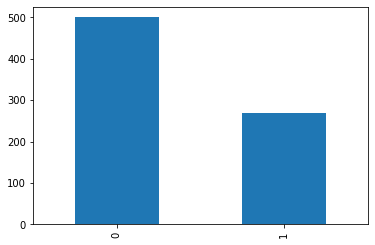

In [ ]:
df.Outcome.value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Cek data di Kolom Glukosa

**Periksa untuk penderita diabetes.**

In [ ]:
df[df.Outcome == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


**Menghapus Pencilan yang lain itu akan mempengaruhi output**, Seperti yang diamati bahwa wanita yang menderita diabetes memiliki rata-rata glukosa 140+ ini menunjukkan bahwa glukosa tinggi untuk pasien diabetes dan karenanya tidak bisa 0. Dan data ini harus dihilangkan.

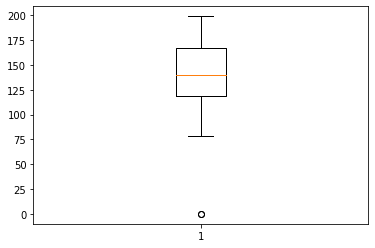

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df[((df.Outcome == 1) & (df.Glucose == 0))]

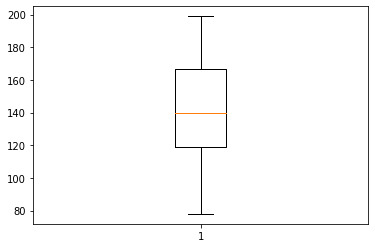

(766, 9)

In [ ]:
df = df[~((df.Outcome == 1) & (df.Glucose == 0))]

plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df.shape

**Periksa untuk pasien non-diabetes.**

In [ ]:
df[(df.Outcome == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


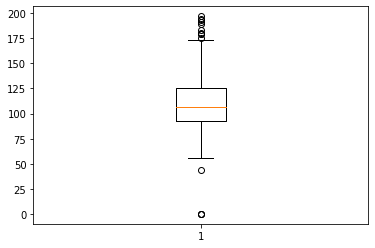

In [ ]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

In [ ]:
df[df.Outcome == 0].Glucose.describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [ ]:
Q1 = df[df.Outcome == 0].Glucose.quantile(0.25)
Q2 = df[df.Outcome == 0].Glucose.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.Glucose < (Q1 - 1.5 * IQR)) |(df.Glucose > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]

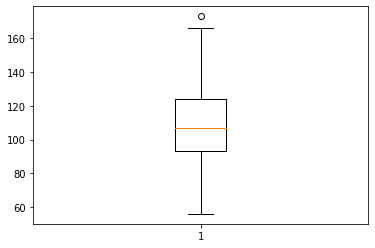

count    486.000000
mean     109.230453
std       22.326637
min       56.000000
25%       93.000000
50%      107.000000
75%      124.000000
max      173.000000
Name: Glucose, dtype: float64

In [ ]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

df[df.Outcome == 0].Glucose.describe()

## Cek datanya di Kolom Tekanan Darah

**Periksa untuk wanita diabetes.**

In [ ]:
df[df.Outcome == 1].BloodPressure.describe()

count    266.000000
mean      70.800752
std       21.564685
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

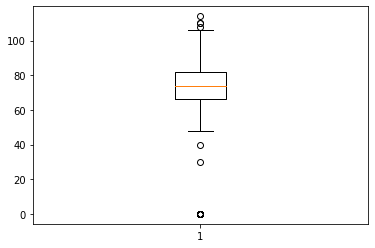

In [ ]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [ ]:
Q1 = df[df.Outcome == 1].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 1].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 1))]

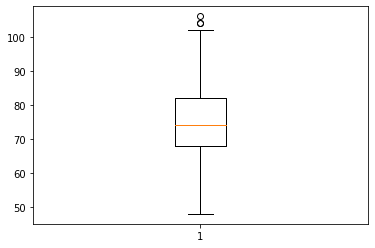

In [ ]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [ ]:
print(df[df.Outcome == 1].BloodPressure.describe())
print(df.shape)

count    244.000000
mean      75.086066
std       11.039248
min       48.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      106.000000
Name: BloodPressure, dtype: float64
(730, 9)


**Periksa untuk wanita non-diabetes.**

In [ ]:
df[df.Outcome == 0].BloodPressure.describe()

count    486.000000
mean      68.006173
std       18.066029
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

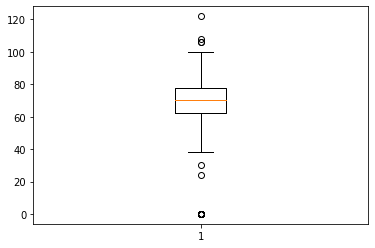

In [ ]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [ ]:
Q1 = df[df.Outcome == 0].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 0].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]

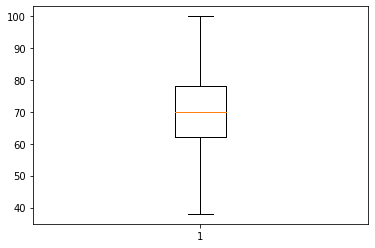

In [ ]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [ ]:
df[df.Outcome == 0].BloodPressure.describe()

count    461.000000
mean      70.618221
std       11.082184
min       38.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      100.000000
Name: BloodPressure, dtype: float64

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1


**Memisahkan dataset.**

In [ ]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df.Outcome

print(X,Y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
5              5      116             74  ...  25.6                     0.201   30
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[70

### Standarisasi Data

In [ ]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)

In [ ]:
X = Standard_data
print(X)
print(Y)

[[ 0.6484389   0.90132294 -0.01462025 ...  0.20629558  0.47926536
   1.42641901]
 [-0.8474689  -1.21387618 -0.5477554  ... -0.7813535  -0.37872943
  -0.18979505]
 [ 1.24680202  2.07643357 -0.72546711 ... -1.24695949  0.61915581
  -0.10473115]
 ...
 [ 0.34925734 -0.00519096 -0.01462025 ... -0.83779059 -0.70824916
  -0.27485895]
 [-0.8474689   0.16268198 -1.08089054 ... -0.28752896 -0.38494678
   1.17122732]
 [-0.8474689  -0.94527946 -0.19233197 ... -0.24520114 -0.49064179
  -0.87030624]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 705, dtype: int64


### Train-Test-Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(705, 8) (564, 8) (141, 8)


### Menerapkan Naive Bayes

**Deklarasi model.**

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train, Y_train)

In [ ]:
Y_pred = modelnb.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1])

**Melatih model.**

In [ ]:
nbtrain.predict_proba(X_test)

array([[9.42350022e-01, 5.76499778e-02],
       [9.48373761e-01, 5.16262388e-02],
       [7.60381265e-01, 2.39618735e-01],
       [8.18088815e-01, 1.81911185e-01],
       [2.69082129e-03, 9.97309179e-01],
       [9.18375048e-01, 8.16249516e-02],
       [8.48906823e-01, 1.51093177e-01],
       [4.83792264e-01, 5.16207736e-01],
       [9.88016643e-01, 1.19833568e-02],
       [8.98691973e-01, 1.01308027e-01],
       [9.95924554e-01, 4.07544592e-03],
       [3.46041448e-01, 6.53958552e-01],
       [9.55245184e-01, 4.47548161e-02],
       [8.62973872e-01, 1.37026128e-01],
       [9.49835065e-01, 5.01649347e-02],
       [5.00803030e-01, 4.99196970e-01],
       [9.99973970e-01, 2.60304688e-05],
       [9.96357925e-01, 3.64207461e-03],
       [9.94862593e-01, 5.13740728e-03],
       [1.68960910e-04, 9.99831039e-01],
       [2.85579699e-01, 7.14420301e-01],
       [8.44121422e-01, 1.55878578e-01],
       [9.94001931e-01, 5.99806913e-03],
       [9.68055561e-01, 3.19444390e-02],
       [9.320607

.

.

.

.

.

**Menggunakan Confusion Matrix untuk menampilkan hasil prediksi.**

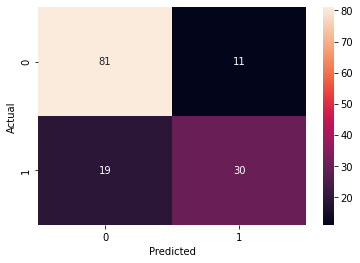

In [ ]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Setelah mengetahui hasil prediksinya, dapat diperhitungkan akurasi dari hasil prediksi tersebut dengan cara sebagai berikut:

Total: 81 + 11 + 19 + 30 = 141

- TP (True Positives) = 81
- TN (True Negatives) = 11
- FP (False Positives) = 19
- FN (False Negatives) = 30

**Perhitungan Akurasi:**
(TP + TN) / Total = (81 + 30) / 141 = 0.78


In [ ]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

Accuracy:  0.7872340425531915


Hasil akurasi sebesar **78.72%**.

In [ ]:
print (X_test) #test dataset
print (Y_pred) #predicted values

[[-1.14665046 -0.87813028  1.14050589 ...  0.74244793 -0.70203181
  -0.78524234]
 [-0.24910578 -0.34093686 -1.43631397 ... -0.28752896  0.26165798
  -0.27485895]
 [-0.54828734  0.26340575  0.16309146 ...  0.14985849  0.36735299
  -0.70017844]
 ...
 [ 1.54598358  1.43851637  0.51851489 ...  0.0934214  -1.00979081
   1.00109952]
 [-0.8474689  -1.18030159 -0.5477554  ...  1.29270956  1.38078161
  -0.35992285]
 [-1.14665046  1.37136719  0.34080317 ...  2.97171299  0.88961069
  -0.70017844]]
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1]
